In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### 0. Data familiarisation and cleaning

In [2]:
# Impporting csv file
car_df = pd.read_csv(r"car_prices.csv", delimiter=',', on_bad_lines='skip') # Skipping 17 out of 558812, because of faulty data
df_original_len = len(car_df)
print('Original length of dataframe:', df_original_len)
print("There are {} rows and {} columns in the dataset".format(car_df.shape[0], car_df.shape[1]))

Original length of dataframe: 558812
There are 558812 rows and 16 columns in the dataset


In [3]:
car_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
#renaming 'make' to 'brand' for easier understanding
car_df.rename(columns={'make': 'brand'}, inplace=True)

In [5]:
car_df.head()

,year,brand,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [6]:
#Getting dataframe information
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558812 entries, 0 to 558811
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558812 non-null  int64  
 1   brand         548511 non-null  object 
 2   model         548413 non-null  object 
 3   trim          548161 non-null  object 
 4   body          545617 non-null  object 
 5   transmission  493459 non-null  object 
 6   vin           558812 non-null  object 
 7   state         558812 non-null  object 
 8   condition     547018 non-null  float64
 9   odometer      558718 non-null  float64
 10  color         558063 non-null  object 
 11  interior      558063 non-null  object 
 12  seller        558812 non-null  object 
 13  mmr           558812 non-null  int64  
 14  sellingprice  558812 non-null  int64  
 15  saledate      558812 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [7]:
#Accessing column names
car_df.columns.values

array(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller',
       'mmr', 'sellingprice', 'saledate'], dtype=object)

In [8]:
#Generating descriptive statistics upfront
car_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558812.000000,547018.000000,558718.000000,558812.000000,558812.000000
mean,2010.038705,3.424514,68323.082106,13769.323628,13611.267630
std,3.966814,0.949439,53397.772770,9679.865976,9749.648961
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52255.500000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [9]:
#Checking brand names and typos for mapping after
pd.set_option('display.max_rows', None)
car_df['brand'].value_counts()

Ford             93554
Chevrolet        60197
Nissan           53946
Toyota           39871
Dodge            30710
Honda            27206
Hyundai          21816
BMW              20719
Kia              18077
Chrysler         17276
Mercedes-Benz    17141
Jeep             15372
Infiniti         15305
Volkswagen       12556
Lexus            11861
GMC              10613
Mazda             8362
Cadillac          7519
Acura             5901
Audi              5869
Lincoln           5757
Buick             5107
Subaru            5043
Ram               4574
Pontiac           4497
Mitsubishi        4140
Volvo             3788
MINI              3224
Saturn            2841
Mercury           1992
Land Rover        1735
Scion             1687
Jaguar            1420
Porsche           1383
Suzuki            1073
FIAT               865
HUMMER             805
Saab               484
ford               443
smart              396
chevrolet          390
Oldsmobile         364
dodge              245
chrysler   

In [10]:
#Mapping similar brand names to a consistent format
car_df['brand'].replace({
    'vw' : 'Volkswagen',
    'ford tk' : 'Ford',
    'ford truck' : 'Ford',
    'chev truck' : 'Chevrolet',
    'dodge tk' : 'Dodge',
    'hyundai tk' : 'Hyundai',
    'bmw' : 'BMW',
    'mercedes-b' : 'Mercedes-Benz',
    'mercedes' : 'Mercedes-Benz',
    'gmc' : 'GMC',
    'gmc truck' : 'GMC',
    'mazda tk' : 'Mazda',
    'landrover' : 'Land Rover',
}, inplace=True)

In [11]:
#Checking brand names and typos after mapping
car_df['brand'].value_counts()

Ford             93558
Chevrolet        60198
Nissan           53946
Toyota           39871
Dodge            30711
Honda            27206
Hyundai          21817
BMW              20793
Kia              18077
Chrysler         17276
Mercedes-Benz    17213
Jeep             15372
Infiniti         15305
Volkswagen       12580
Lexus            11861
GMC              10649
Mazda             8363
Cadillac          7519
Acura             5901
Audi              5869
Lincoln           5757
Buick             5107
Subaru            5043
Ram               4574
Pontiac           4497
Mitsubishi        4140
Volvo             3788
MINI              3224
Saturn            2841
Mercury           1992
Land Rover        1762
Scion             1687
Jaguar            1420
Porsche           1383
Suzuki            1073
FIAT               865
HUMMER             805
Saab               484
ford               443
smart              396
chevrolet          390
Oldsmobile         364
dodge              245
chrysler   

In [12]:
#Capitalizing brand names
car_df['brand'] = car_df['brand'].str.capitalize()
car_df['brand'].value_counts()

Ford             94001
Chevrolet        60588
Nissan           54017
Toyota           39966
Dodge            30956
Honda            27351
Hyundai          21837
Bmw              20793
Kia              18084
Chrysler         17485
Mercedes-benz    17213
Jeep             15483
Infiniti         15305
Volkswagen       12604
Lexus            11980
Gmc              10649
Mazda             8509
Cadillac          7629
Acura             5926
Audi              5877
Lincoln           5786
Buick             5121
Subaru            5103
Ram               4574
Pontiac           4524
Mitsubishi        4257
Volvo             3788
Mini              3224
Saturn            2841
Mercury           2023
Land rover        1891
Scion             1687
Jaguar            1420
Porsche           1402
Suzuki            1078
Fiat               865
Hummer             805
Saab               484
Smart              396
Oldsmobile         384
Isuzu              204
Maserati           136
Bentley            116
Plymouth   

In [13]:
#Checking for missing values
missing_values = car_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
year                0
brand           10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [14]:
#Identify rows with missing 'transmission'
missing_transmission = car_df[car_df['transmission'].isnull()]

#Group by 'brand', 'model', 'trim', and 'year' columns
grouped = car_df.groupby(['brand', 'model', 'trim', 'year'])

#Function to fill missing 'transmission' with most frequent value in each group
def fill_missing_transmission(group):
    most_common = group['transmission'].mode()
    if len(most_common) > 0:
        group['transmission'] = group['transmission'].fillna(most_common[0])
    return group

#Apply the function to fill missing 'transmission'
filled_transmission = grouped.apply(fill_missing_transmission)

#Update the original DataFrame with filled values
car_df['transmission'] = filled_transmission['transmission']

/var/folders/65/5zkp1bys09s2tm2tg0bqn9wc0000gn/T/ipykernel_17450/868540037.py:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  filled_transmission = grouped.apply(fill_missing_transmission)


In [15]:
#Checking for the effect of the previous code
missing_values = car_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
year                0
brand           10301
model           10399
trim            10651
body            13195
transmission    11141
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [16]:
#Checking duplicates
duplicates = car_df.duplicated().sum()
print("Duplicate values: " + str(duplicates))

Duplicate values: 0


In [17]:
#Checking data types for every column
print("Data types in this dataset are:")
print(car_df.dtypes)

Data types in this dataset are:
year              int64
brand            object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object


In [18]:
#Getting all columns with numerical data
numerical_col = car_df.select_dtypes(['int64', 'float64']).columns
print("The numerical columns are:")
print(numerical_col)

The numerical columns are:
Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')


In [19]:
#Getting all columns with categorical data
cat_col = car_df.select_dtypes([object]).columns
print("The categorical columns are:")
print(cat_col)

The categorical columns are:
Index(['brand', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller', 'saledate'],
      dtype='object')


### 1. EDA

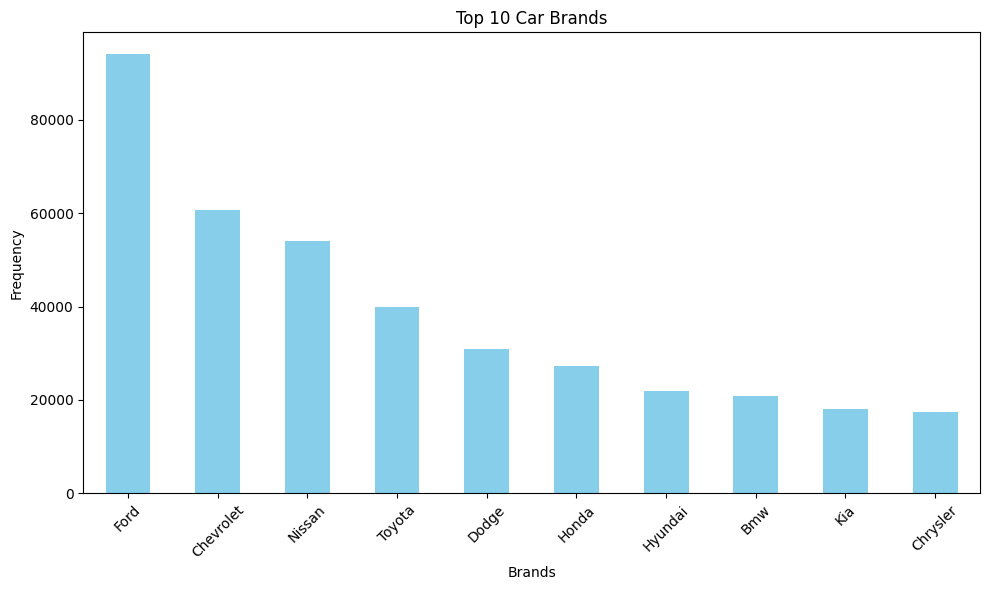

In [20]:
#Checking the top 10 cars that are auctioned
top_brands = car_df['brand'].value_counts().nlargest(10)

#Plotting the top 10 brands
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Car Brands')
plt.xlabel('Brands')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()